In [10]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Excel dosyası başarıyla yüklendi ve temizlendi.

--- Analiz Sonuçları ---
Mutluluk vs. GSYİH Korelasyonu (r): 0.7627
Mutluluk vs. Güven Korelasyonu (r): 0.4125


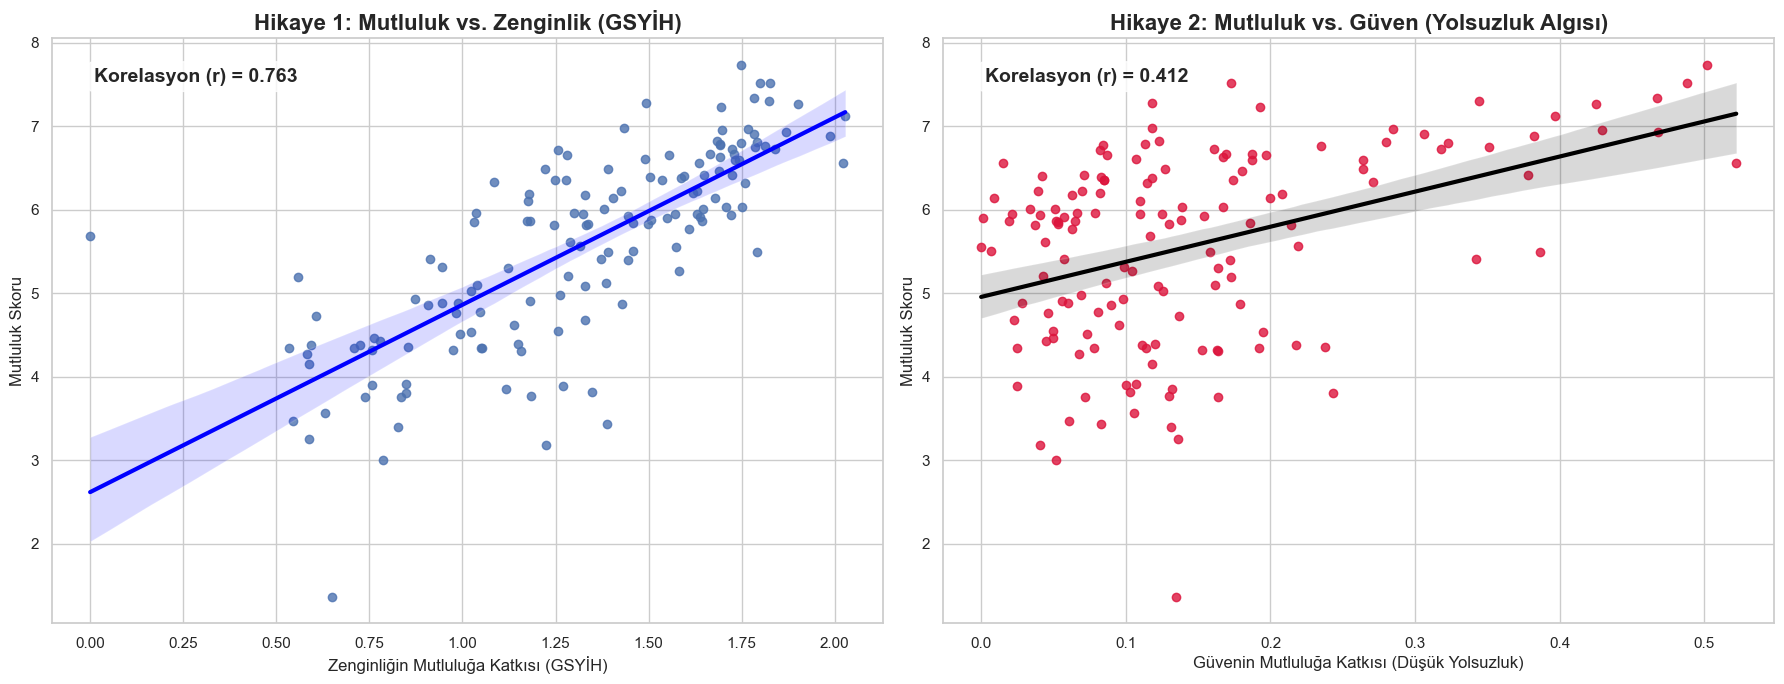

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Gerekli Kütüphaneler (Hatırlatma)
# 'xlrd' (veya dosyanız .xlsx ise 'openpyxl') yüklü olmalı
# !pip install xlrd
# -------------------------------------------------------------------

# -------------------------------------------------------------------
# ADIM 1: Veriyi Yükleme
# -------------------------------------------------------------------

dosya_yolu = "../data/WHR_2025.xlsx" 
df = None  

try:
    df = pd.read_excel(dosya_yolu)
    df.columns = df.columns.str.strip()
    
    # Gerekli sütunları yeniden adlandıralım
    # ÖNEMLİ: Gerçek sütun adlarınızı buradan kontrol edin.
    df = df.rename(columns={
        'Ladder score': 'Mutluluk Skoru',
        'Explained by: Log GDP per capita': 'GSYİH Katkısı',
        'Explained by: Perceptions of corruption': 'Yolsuzluk Algısı Katkısı'
    })

    # Analiz için gerekli sütunlarda eksik veri (NaN) varsa o satırları atla
    # Bu, korelasyon hesabının hatasız çalışmasını sağlar
    df = df.dropna(subset=['Mutluluk Skoru', 'GSYİH Katkısı', 'Yolsuzluk Algısı Katkısı'])

    print("Excel dosyası başarıyla yüklendi ve temizlendi.")

except Exception as e:
    print(f"HATA: Veri yüklenirken bir sorun oluştu: {e}")
    print(f"Dosya yolunu ('{dosya_yolu}') ve sütun adlarını kontrol edin.")


# -------------------------------------------------------------------
# ADIM 2: Görselleştirme (KORELASYON İLE GÜNCELLENDİ)
# -------------------------------------------------------------------

if df is not None:
    # --- YENİ BÖLÜM: KORELASYON HESAPLAMA ---
    # Gözümüzle gördüğümüz "güçlü" ilişkinin matematiksel kanıtı
    
    # 'r' değeri 1'e ne kadar yakınsa, ilişki o kadar güçlüdür.
    corr_gdp = df['Mutluluk Skoru'].corr(df['GSYİH Katkısı'])
    corr_corruption = df['Mutluluk Skoru'].corr(df['Yolsuzluk Algısı Katkısı'])
    
    print(f"\n--- Analiz Sonuçları ---")
    print(f"Mutluluk vs. GSYİH Korelasyonu (r): {corr_gdp:.4f}")
    print(f"Mutluluk vs. Güven Korelasyonu (r): {corr_corruption:.4f}")
    # -----------------------------------------

    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # --- GRAFİK 1 (Sol Taraf): Mutluluk vs. Zenginlik ---
    sns.regplot(
        data=df, x='GSYİH Katkısı', y='Mutluluk Skoru',
        ax=axes[0], line_kws={"color": "blue", "lw": 3}
    )
    axes[0].set_title('Hikaye 1: Mutluluk vs. Zenginlik (GSYİH)', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Zenginliğin Mutluluğa Katkısı (GSYİH)', fontsize=12)
    axes[0].set_ylabel('Mutluluk Skoru', fontsize=12)
    
    # YENİ: Hesaplanan korelasyonu grafiğe yazdır
    axes[0].text(
        0.05, 0.95,  # X ve Y konumu (% olarak: sol üst köşe)
        f'Korelasyon (r) = {corr_gdp:.3f}',  # Yazdırılacak metin
        transform=axes[0].transAxes,  # %'li konumlandırma için
        fontsize=14, 
        fontweight='bold',
        verticalalignment='top',  # Metni yukarıdan hizala
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8) # Beyaz kutu
    )

    # --- GRAFİK 2 (Sağ Taraf): Mutluluk vs. Güven ---
    sns.regplot(
        data=df, x='Yolsuzluk Algısı Katkısı', y='Mutluluk Skoru',
        ax=axes[1], color='crimson', line_kws={"color": "black", "lw": 3}
    )
    axes[1].set_title('Hikaye 2: Mutluluk vs. Güven (Yolsuzluk Algısı)', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Güvenin Mutluluğa Katkısı (Düşük Yolsuzluk)', fontsize=12)
    axes[1].set_ylabel('Mutluluk Skoru', fontsize=12)
    
    # YENİ: Hesaplanan korelasyonu grafiğe yazdır
    axes[1].text(
        0.05, 0.95, 
        f'Korelasyon (r) = {corr_corruption:.3f}', 
        transform=axes[1].transAxes, 
        fontsize=14, 
        fontweight='bold',
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()

else:
    print("\nVeri yüklenemediği için grafikler oluşturulamadı.")

In [12]:
%pip install geopandas
%pip install pyogrio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Mevcut 'df' DataFrame'i kullanılarak Geopandas haritası oluşturuluyor...
GitHub üzerinden harita dosyası başarıyla yüklendi.
Harita çizdiriliyor...


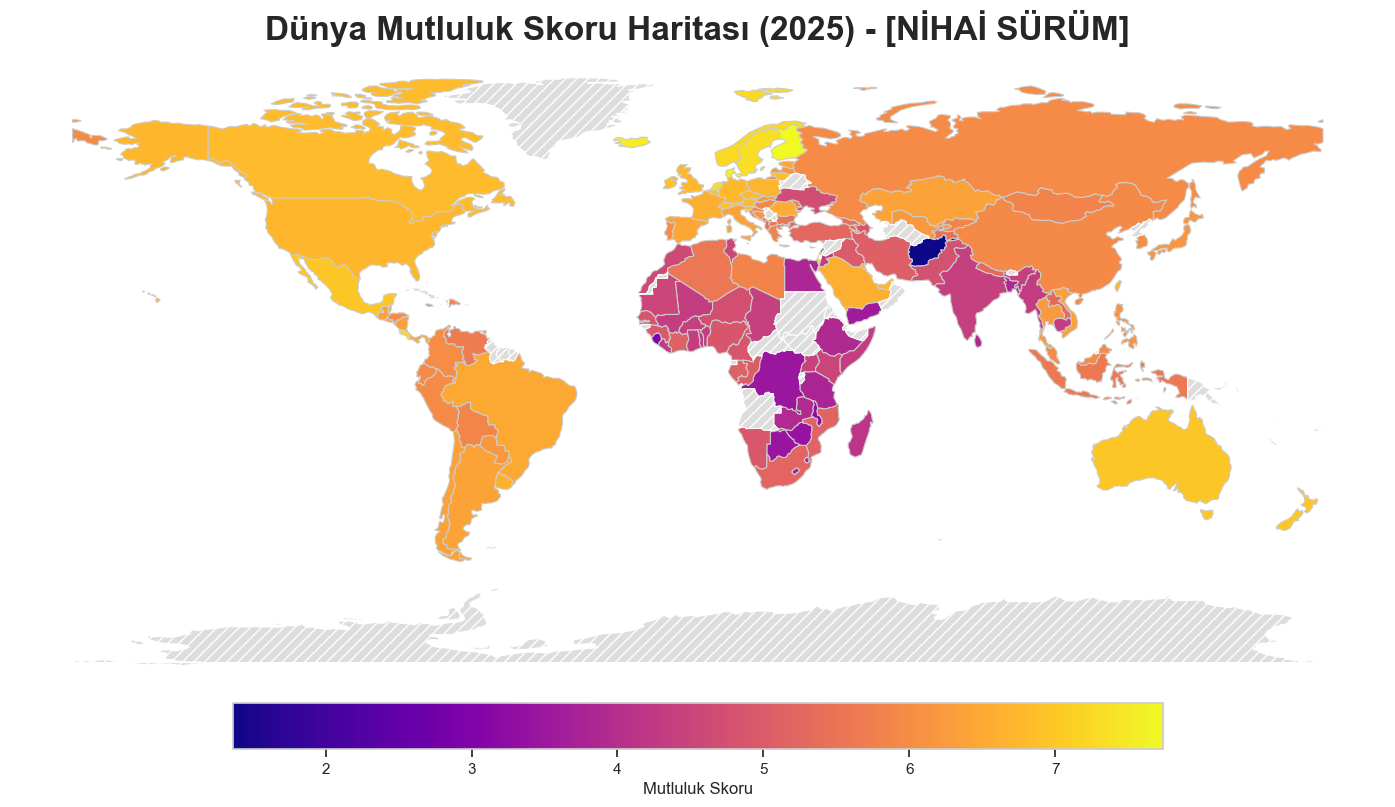

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- KONTROL: df DataFrame'i yüklü mü? ---
if 'df' not in locals() or df is None:
    print("HATA: 'df' DataFrame'i mevcut değil. Lütfen önce veri yükleme kodunu çalıştırın.")
else:
    print("Mevcut 'df' DataFrame'i kullanılarak Geopandas haritası oluşturuluyor...")
    world = None

    # --- ADIM 1: Harita Şekillerini Yükle (Stabil GitHub Linki) ---
    harita_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
    
    try:
        world = gpd.read_file(harita_url)
        print("GitHub üzerinden harita dosyası başarıyla yüklendi.")
        world['name'] = world['name'].str.strip()
        
    except Exception as e:
        print(f"HATA: GitHub'dan harita yüklenirken bir sorun oluştu: {e}")

    
    # --- ADIM 2, 3 ve 4: SADECE HARİTA BAŞARIYLA YÜKLENDİYSE DEVAM ET ---
    if world is not None:
        
        # --- ADIM 2: Veri Eşleştirme Hazırlığı (TÜM DÜZELTMELER EKLENDİ) ---
        df_for_map = df.copy()
        df_for_map['Country name'] = df_for_map['Country name'].str.strip()
        
        # --- NİHAİ EŞLEŞTİRME SÖZLÜĞÜ (Tüm 22 Ülke) ---
        # "Senin Verindeki İsim": "Haritadaki İsim"
        country_name_map = {
            # Öncekiler:
            'Türkiye': 'Turkey',
            'United States': 'United States of America',
            'Czechia': 'Czech Republic',
            'DR Congo': 'Democratic Republic of the Congo',
            'Congo': 'Republic of the Congo',
            'Russian Federation': 'Russia',
            'Republic of Korea': 'South Korea',
            'Lao PDR': 'Laos',
            'Viet Nam': 'Vietnam',
            'Tanzania': 'United Republic of Tanzania',
            'Côte d’Ivoire': 'Ivory Coast',
            'North Macedonia': 'Macedonia',
            'Republic of Moldova': 'Moldova',
            'Taiwan Province of China': 'Taiwan',
            'State of Palestine': 'Palestine',
            'Hong Kong SAR of China': 'Hong Kong',
            
            # YENİ EKLENEN 6 EKSİK ÜLKE:
            'Serbia': 'Serbia', # Sırbistan eşleşmesi
            'Eswatini': 'Swaziland', # Eswatini'nin haritadaki eski adı
            'Bahrain': 'Bahrain', # Zorla eşleştirme
            'Comoros': 'Comoros', # Zorla eşleştirme
            'Mauritius': 'Mauritius', # Zorla eşleştirme
            'Singapore': 'Singapore'  # Zorla eşleştirme
        }
        
        df_for_map['Country name'] = df_for_map['Country name'].replace(country_name_map)
        
        # --- ADIM 3: Harita ve Veriyi Birleştir (Merge) ---
        merged_map_data = world.merge(
            df_for_map,
            left_on='name',        
            right_on='Country name', 
            how='left'             
        )

        # --- ADIM 4: Statik Haritayı Çizdir ---
        print("Harita çizdiriliyor...")
        
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))

        merged_map_data.plot(
            column='Mutluluk Skoru', 
            cmap='plasma',          
            linewidth=0.8,            
            ax=ax,                    
            edgecolor='0.8',          
            legend=True,              
            legend_kwds={
                'label': "Mutluluk Skoru",
                'orientation': "horizontal",
                'shrink': 0.6, 
                'pad': 0.01     
            },
            missing_kwds={
                'color': '#DDDDDD', 
                'edgecolor': 'white',
                'hatch': '///',
                'label': 'Veri Yok'
            }
        )

        ax.axis('off')
        ax.set_title(
            'Dünya Mutluluk Skoru Haritası (2025) - [NİHAİ SÜRÜM]',
            fontdict={'fontsize': 24, 'fontweight': 'bold'}
        )
        
        plt.show()
    
    else:
        print("Harita verisi yüklenemediği için çizim işlemi iptal edildi.")

In [14]:
import pandas as pd
import geopandas as gpd

# --- KONTROL: 'df' ve 'world' DataFrame'leri yüklü mü? ---
# (Eğer notebook'u yeniden başlattıysan, önceki hücreleri tekrar çalıştırman gerekebilir)

if 'df' not in locals() or 'world' not in locals():
    print("HATA: 'df' veya 'world' DataFrame'leri bulunamadı.")
    print("Lütfen önce veri yükleme ve harita yükleme hücrelerini tekrar çalıştırın.")
else:
    print("--- Eşleşmeyen Ülke Analizi Başlatıldı ---")
    
    # 1. Haritadaki ülke adları seti (benzersiz)
    map_countries_set = set(world['name'])
    
    # 2. Senin veri setindeki ülke adları seti (benzersiz)
    data_countries_set = set(df['Country name'])
    
    # --- Analiz 1: Veri setinde olup haritada bulunamayanlar (ASIL SORUNUMUZ) ---
    unmatched_data_countries = data_countries_set - map_countries_set
    
    print(f"\n>>> HARİTADA EŞLEŞME BULUNAMAYAN ÜLKELER ({len(unmatched_data_countries)} adet):")
    print("---------------------------------------------------------------")
    print("Anlamı: Bu ülkeler 'Mutluluk Raporu'nda var ama harita verisindeki")
    print("isimle eşleşmediği için gri/taranmış görünüyorlar.")
    
    if len(unmatched_data_countries) > 0:
        for country in sorted(unmatched_data_countries):
            print(f"- {country}")
    else:
        print("Mükemmel! Veri setindeki tüm ülkeler haritada bir karşılık buldu.")
        
    print("\n")
    
    # --- Analiz 2: Haritada olup veri setinde bulunamayanlar (NORMAL DURUM) ---
    unmatched_map_countries = map_countries_set - data_countries_set
    
    print(f">>> VERİ SETİNDE OLMAYAN HARİTA ÜLKELERİ ({len(unmatched_map_countries)} adet):")
    print("---------------------------------------------------------------")
    print("Anlamı: Bu ülkeler raporda yok (veya adı farklı).")
    print("Bunların gri/taranmış görünmesi normaldir.")
    # (Çok uzun olmaması için sadece ilk 15 tanesini göster)
    for country in sorted(list(unmatched_map_countries))[:15]:
        print(f"- {country}")
    print("...ve daha fazlası...")

--- Eşleşmeyen Ülke Analizi Başlatıldı ---

>>> HARİTADA EŞLEŞME BULUNAMAYAN ÜLKELER (22 adet):
---------------------------------------------------------------
Anlamı: Bu ülkeler 'Mutluluk Raporu'nda var ama harita verisindeki
isimle eşleşmediği için gri/taranmış görünüyorlar.
- Bahrain
- Comoros
- Congo
- Czechia
- Côte d’Ivoire
- DR Congo
- Eswatini
- Hong Kong SAR of China
- Lao PDR
- Mauritius
- North Macedonia
- Republic of Korea
- Republic of Moldova
- Russian Federation
- Serbia
- Singapore
- State of Palestine
- Taiwan Province of China
- Tanzania
- Türkiye
- United States
- Viet Nam


>>> VERİ SETİNDE OLMAYAN HARİTA ÜLKELERİ (56 adet):
---------------------------------------------------------------
Anlamı: Bu ülkeler raporda yok (veya adı farklı).
Bunların gri/taranmış görünmesi normaldir.
- Angola
- Antarctica
- Belarus
- Bermuda
- Bhutan
- Brunei
- Burundi
- Central African Republic
- Cuba
- Czech Republic
- Democratic Republic of the Congo
- Djibouti
- East Timor
- Equatori